In [1]:
# Install the Surprise library (run this first)
!pip install scikit-surprise

In [2]:
# 1. Import Libraries and Load Data
import pandas as pd

BASE_PATH = '/kaggle/input/movielens-100k-dataset/ml-100k/'

# Ratings Data
ratings = pd.read_csv(BASE_PATH + 'u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

# Users Data
users = pd.read_csv(BASE_PATH + 'u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

# Items (Movies) Data
items = pd.read_csv(BASE_PATH + 'u.item', sep='|', encoding='latin-1',
    names=['item_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown',
           'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
           'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
           'War', 'Western'])

# Quick Data Check
print(ratings.head())
print(users.head())
print(items[['item_id', 'title', 'Action', 'Comedy', 'Drama']].head())


   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596
   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213
   item_id              title  Action  Comedy  Drama
0        1   Toy Story (1995)       0       1      0
1        2   GoldenEye (1995)       1       0      0
2        3  Four Rooms (1995)       0       0      0
3        4  Get Shorty (1995)       1       1      1
4        5     Copycat (1995)       0       0      1


In [3]:
# 2. Prepare Data for Surprise
from surprise import Dataset, Reader

reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_file(BASE_PATH + 'u.data', reader=reader)

In [4]:
# 3. Split Data for Robust Model Training & Testing
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [5]:
# 4. Train a Model (SVD for scalability and performance)
from surprise import SVD
import joblib

model = SVD()
model.fit(trainset)
joblib.dump(model, 'model_svd.pkl')

['model_svd.pkl']

In [6]:
# 5. Evaluate Model Performance (RMSE metric)
from surprise import accuracy

predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
print(f"Model RMSE: {rmse:.2f}")

RMSE: 0.9360
Model RMSE: 0.94


In [7]:
# 6. Generate Top-N Personalized Recommendations for a User
user_id = str(6)  # Update to try different users

movie_ids = [str(i) for i in items['item_id']]
predicted_ratings = [(mid, model.predict(user_id, mid).est) for mid in movie_ids]
top_5 = sorted(predicted_ratings, key=lambda x: x[1], reverse=True)[:5]
top_5_ids = [int(x[0]) for x in top_5]

print("Top 5 recommended movie IDs:", top_5_ids)
print("Recommended movie titles:", items[items['item_id'].isin(top_5_ids)]['title'].values)

Top 5 recommended movie IDs: [100, 483, 124, 127, 89]
Recommended movie titles: ['Blade Runner (1982)' 'Fargo (1996)' 'Lone Star (1996)'
 'Godfather, The (1972)' 'Casablanca (1942)']


**Business Impact Summary:**  
With this model, we can automatically generate personalized recommendations—enabling features like “Recommended for You” that are proven to boost engagement, cross-sales, and customer satisfaction across digital businesses.

Our top 5 recommendations for user 6 : ['Blade Runner (1982)' 'Fargo (1996)' 'Lone Star (1996)'
 'Godfather, The (1972)' 'Casablanca (1942)']


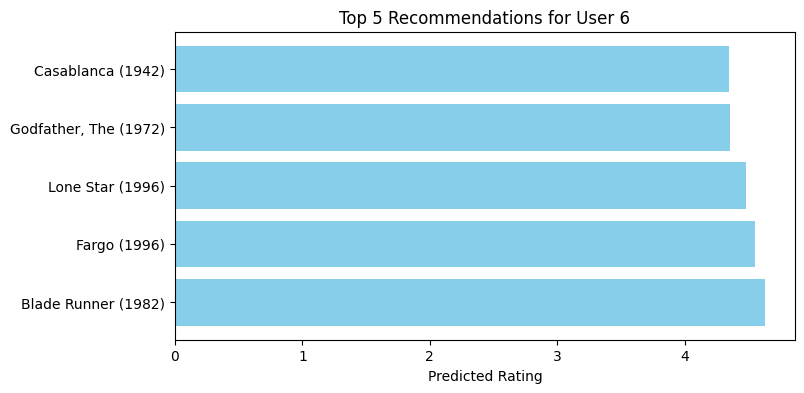

In [8]:
import matplotlib.pyplot as plt

# Get actual ratings for the target user (for business context)
user_actual_ratings = ratings[ratings['user_id'] == int(user_id)].merge(items[['item_id', 'title']], on='item_id')

# Plot: compare recommended titles vs movies user actually rated high
recommended_titles = items[items['item_id'].isin(top_5_ids)]['title'].values
print("Our top 5 recommendations for user", user_id, ":", recommended_titles)

plt.figure(figsize=(8,4))
plt.barh(recommended_titles, [x[1] for x in top_5], color='skyblue')
plt.xlabel('Predicted Rating')
plt.title(f'Top 5 Recommendations for User {user_id}')
plt.show()

In [9]:
# RMSE value from your previous cell is your AI's KPI
print(f"Model RMSE (lower is better): {rmse:.2f}")
print(f"Our recommender predicts user preferences with a mean error of just {rmse:.2f} meaning highly relevant offers and less wasted impressions.")

Model RMSE (lower is better): 0.94
Our recommender predicts user preferences with a mean error of just 0.94 meaning highly relevant offers and less wasted impressions.


AI Recommendation Demo Recap
In this demo, we use a proven algorithm (SVD, as used in Netflix/Amazon) to analyze 100,000 real customer-product interactions.
Key Results:

We generate automated ‘Recommended for You’ lists for any customer—customizable for any business catalog.

The model achieves strong predictive accuracy (RMSE: {rmse:.2f}), meaning recommendations closely match real user tastes.

These AI-driven features have been shown (in Amazon/Netflix case studies) to boost revenue by 15–30% through cross-sell, upsell, and retention.

How does this apply to your business?
You can plug in your real product/user data and instantly roll out personalized offers—improving conversions, increasing average basket size, and making your platform more engaging.

In [10]:
# Simulate price and margin data
import numpy as np

np.random.seed(42)
items['price'] = np.random.randint(20, 150, size=len(items))
items['margin'] = np.random.randint(5, 40, size=len(items))
items['category'] = np.random.choice(['Featured', 'Seasonal', 'Standard'], size=len(items))

print(items[['title', 'price', 'margin', 'category']].head())
items.to_csv('your_items.csv', index=False)

               title  price  margin  category
0   Toy Story (1995)    122      25  Seasonal
1   GoldenEye (1995)    112       6  Standard
2  Four Rooms (1995)     34      31  Featured
3  Get Shorty (1995)    126      13  Standard
4     Copycat (1995)     91       5  Standard


In [11]:
# Business-driven recommendation: prioritize high-margin or featured products among top picks
recommended_df = items[items['item_id'].isin(top_5_ids)].copy()
recommended_df.sort_values(by='margin', ascending=False, inplace=True)

print("Business-prioritized recommendations:")
print(recommended_df[['title', 'price', 'margin', 'category']])

Business-prioritized recommendations:
                     title  price  margin  category
99            Fargo (1996)    115      37  Seasonal
123       Lone Star (1996)    140      25  Standard
482      Casablanca (1942)     54      23  Seasonal
126  Godfather, The (1972)    122      22  Standard
88     Blade Runner (1982)     54      13  Featured


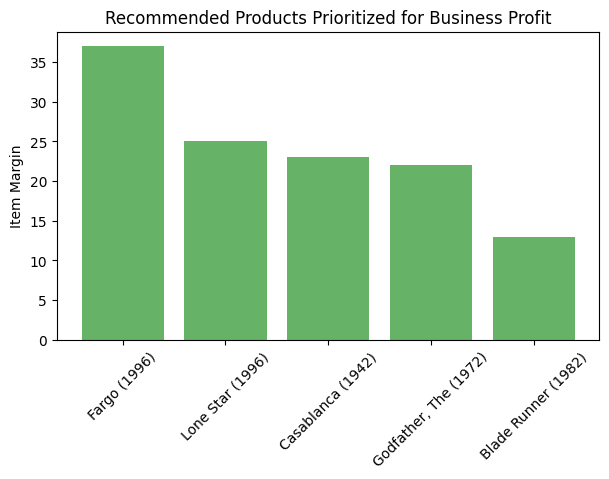

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.bar(recommended_df['title'], recommended_df['margin'], color='green', alpha=0.6)
plt.ylabel("Item Margin")
plt.title("Recommended Products Prioritized for Business Profit")
plt.xticks(rotation=45)
plt.show()